In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

%matplotlib inline

In [24]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


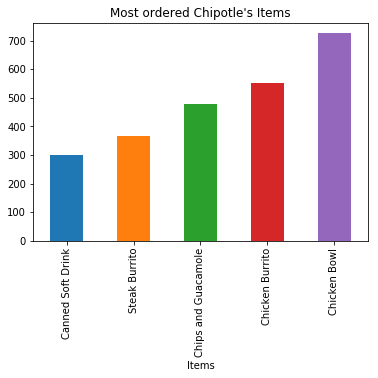

In [25]:
# get the Series of the names
x = chipo.item_name

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = collections.Counter(x)

# convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')

df = df[0].sort_values(ascending = True)[45:50]

df.plot(kind='bar')
plt.xlabel('Items')
plt.title('Most ordered Chipotle\'s Items');

In [26]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]

orders = chipo.groupby('order_id').sum()

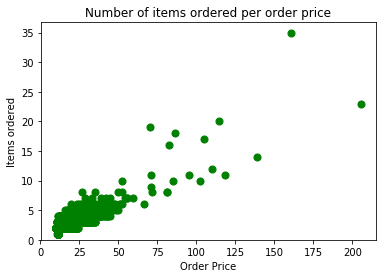

In [29]:
plt.scatter(x = orders.item_price, y = orders.quantity,
           s=50, c='green')
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0);

# 2. Online Retails Purchase

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks')

online_rt = pd.read_csv('../datasets/Online_Retail.csv')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


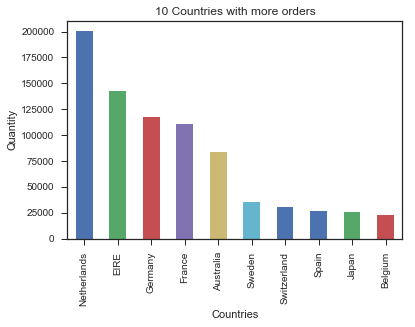

In [40]:
countries = online_rt.groupby('Country').sum()
countries = countries.sort_values(by='Quantity', ascending=False)[1:11]

countries.Quantity.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with more orders');

In [41]:
# Exclude negative Quatity entries
online_rt = online_rt[online_rt.Quantity > 0]

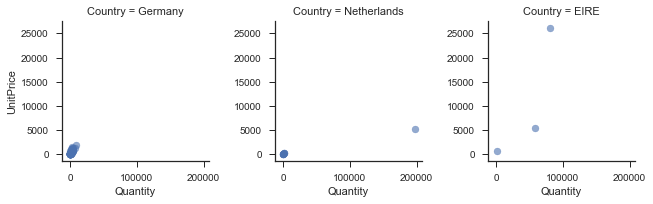

In [46]:
customers = online_rt.groupby(['CustomerID', 'Country']).sum()
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)

top_countries = ['Netherlands', 'EIRE', 'Germany']

customers = customers[customers.Country.isin(top_countries)]

g = sns.FacetGrid(customers, col='Country')
g.map(plt.scatter, 'Quantity', 'UnitPrice', alpha=0.6)
g.add_legend();

# 3. Scores

In [47]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'female', 'preTestScore', 'postTestScore'])

df

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


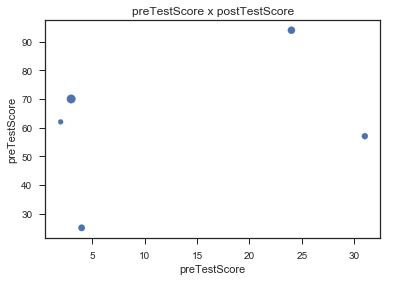

In [49]:
plt.scatter(df.preTestScore, df.postTestScore, s=df.age)

#set labels and titles
plt.title("preTestScore x postTestScore")
plt.xlabel('preTestScore')
plt.ylabel('preTestScore');

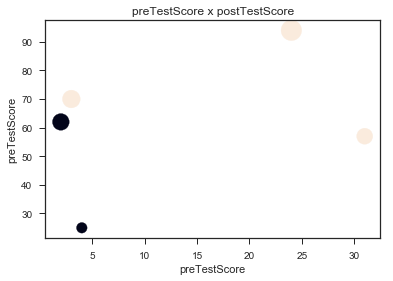

In [50]:
plt.scatter(df.preTestScore, df.postTestScore, s= df.postTestScore * 4.5, c = df.female)

#set labels and titles
plt.title("preTestScore x postTestScore")
plt.xlabel('preTestScore')
plt.ylabel('preTestScore');

# 4. Tips

In [51]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# print the graphs in the notebook
% matplotlib inline

# set seaborn style to white
sns.set_style("white")

In [52]:
tips = pd.read_csv('../datasets/tips.csv')
tips.tail()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2
243,243,18.78,3.00,Female,No,Thur,Dinner,2


In [53]:
del tips['Unnamed: 0']

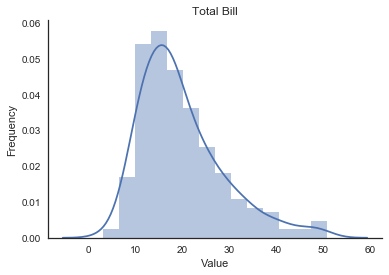

In [54]:
ttbill = sns.distplot(tips.total_bill)
ttbill.set(xlabel='Value', ylabel='Frequency', title='Total Bill')
sns.despine();

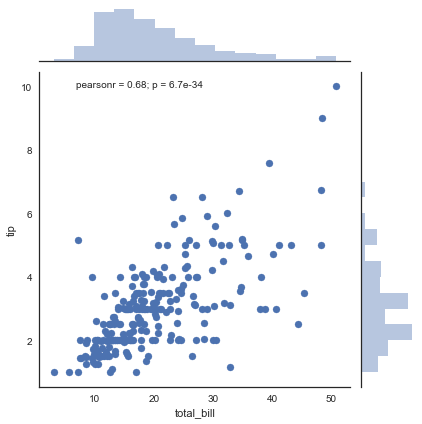

In [55]:
sns.jointplot(x='total_bill', y='tip', data=tips);

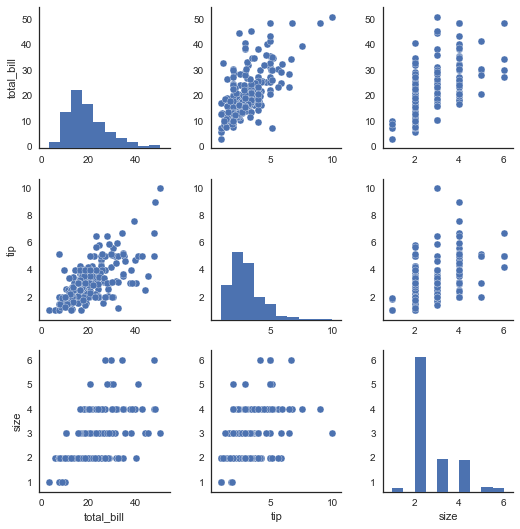

In [57]:
sns.pairplot(tips);

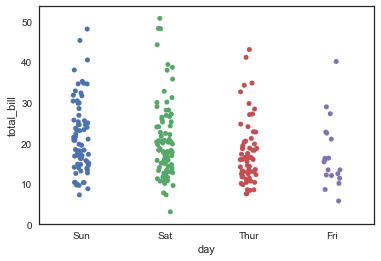

In [58]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True);

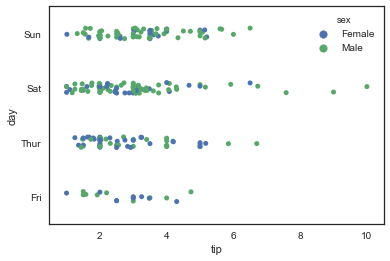

In [60]:
sns.stripplot(x='tip', y='day', hue='sex', data=tips, jitter=True);

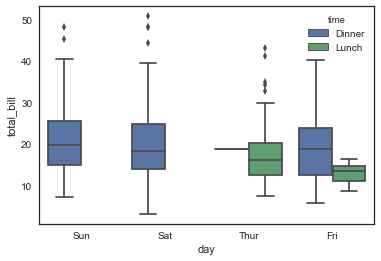

In [61]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips);

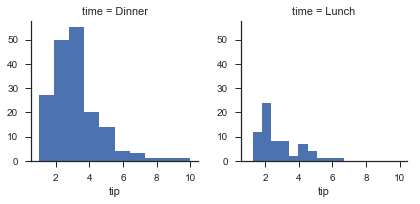

In [63]:
sns.set(style='ticks')

g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, 'tip');

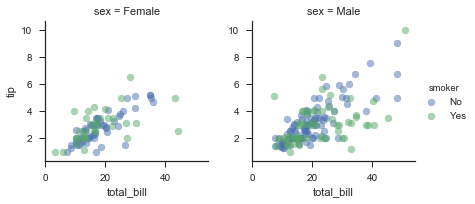

In [65]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha=0.5)
g.add_legend();

# 4. Titanic

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [68]:
titanic = pd.read_csv('../datasets/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


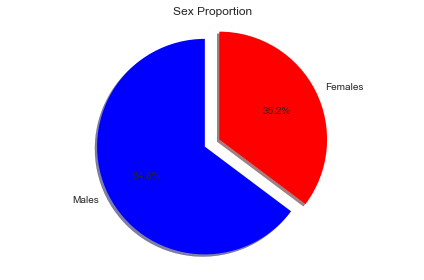

In [70]:
males = (titanic.Sex == 'male').sum()
females = (titanic.Sex == 'female').sum()

proportions = [males, females]

plt.pie(proportions, labels=['Males', 'Females'],
       shadow=True, colors=['blue', 'red'],
       explode = (0.15, 0),
       startangle = 90,
       autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Sex Proportion')
plt.tight_layout();

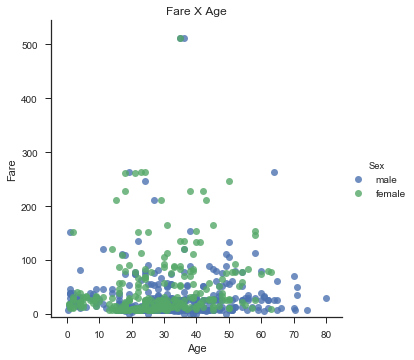

In [75]:
lm = sns.lmplot(x='Age', y='Fare', data=titanic, hue='Sex', fit_reg=False)
lm.set(title='Fare X Age')
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85);

In [76]:
titanic.Survived.sum()

342

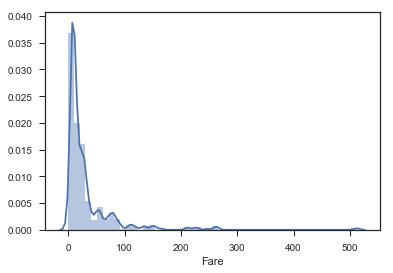

In [81]:
sns.distplot(titanic.Fare);

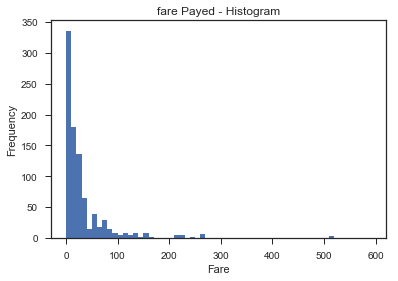

In [84]:
df = titanic.Fare.sort_values(ascending=False)

binsVal = np.arange(0, 600, 10)

plt.hist(df, bins=binsVal)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('fare Payed - Histogram');